In [1]:
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in ids data
idspath = "Database/cleaned/PhysicalDimension/ids/ids.csv"
ids = pd.read_csv(idspath)

In [3]:
#read in firewall data
fwpath = "Database/cleaned/PhysicalDimension/firewall/firewall.csv"
firewall = pd.read_csv(fwpath)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#read and process pcap files
pcappath = "Database/cleaned/PhysicalDimension/pcaps/"
pcaps = [pd.read_csv(pcappath+i, sep="\t", header=None) for i in os.listdir(pcappath)]
pcapdata=pd.concat(pcaps)
pcapdata = pcapdata.fillna(0)

In [5]:
pcapdata = pcapdata.fillna(0)

In [6]:
#select needed columns
pcapcols=['datetime','epoch_time','source_ip','destination_ip','source_port','destination_port','protocol','ip_length','frame_length','frame_cap_length','time_to_live','ethernet_length','ip_flag']
idscols=['datetime','srcip','dstip','priority','alert','description']
fwcols = list(firewall.columns)[1::]

In [7]:
pcapdata.columns = pcapcols
ids= ids[idscols]
firewall = firewall[fwcols]

In [8]:
#format pcap datetime
pcapdata['datetime'] = [dt.strptime(i.split(".")[0],'%b %d, %Y %H:%M:%S') for i in pcapdata.datetime]

In [9]:
#format ids datetime
ids['datetime'] = [dt.strptime(i,'%Y-%m-%d %H:%M:%S') for i in ids.datetime]

In [10]:
#format firewall datetime
firewall['datetime'] = [dt.strptime(i,'%Y-%m-%d %H:%M:%S') for i in firewall.datetime]

In [ ]:
firewall.head()

In [ ]:
#aggregate

In [11]:
#aggregate pcaps on datetime
pcapd = pcapdata.groupby("datetime")[['epoch_time','ip_length', 'frame_length','frame_cap_length','time_to_live','ethernet_length']].sum()

In [14]:
pcapd['source_port'] = [len(i) for i in pcapdata.groupby("datetime")["source_port"].unique()]
pcapd['source_port'] = [len(i) for i in pcapdata.groupby("datetime")["destination_port"].unique()]
pcapd['source_port']= [len(i) for i in pcapdata.groupby("datetime")["source_ip"].unique()]
pcapd['destination_ip'] = [len(i) for i in pcapdata.groupby("datetime")["destination_ip"].unique()]
pcapd['ip_flags'] = [len(i) for i in pcapdata.groupby("datetime")["ip_flag"].unique()]
pcapd['protocols'] = [len(i) for i in pcapdata.groupby("datetime")["protocol"].unique()]
pcapd['Number_Packets'] = pcapdata.groupby("datetime")['datetime'].count()

In [16]:
pcapd.to_csv("Database/aggregated/PhysicalDimension/pcap_per_sec_agg.csv")

In [24]:
pcapd['permin'] = [str(i)[:-3] for i in list(pcapd.index)]

In [26]:
pcappermin = pcapd.groupby("permin").sum()
pcappermin.to_csv("Database/aggregated/PhysicalDimension/pcap_per_min_agg.csv")

In [28]:
ids.head()

,datetime,srcip,dstip,priority,alert,description
0,2011-04-13 07:54:00,192.168.2.136,192.168.1.14,3,portscan,TCP Portscan
1,2011-04-13 07:54:00,192.168.2.136,192.168.1.2,3,portscan,TCP Portscan
2,2011-04-13 07:54:05,192.168.2.136,192.168.1.14,3,portscan,TCP Portsweep
3,2011-04-13 07:54:53,192.168.2.145,192.168.1.14,3,portscan,TCP Portscan
4,2011-04-13 07:54:53,192.168.2.145,192.168.1.2,3,portscan,TCP Portscan


In [2]:
microprobs = pd.read_csv("Database/cleaned/SocialDimension/microprobs.csv")
microblogs = pd.read_csv("Database/cleaned/SocialDimension/microblogs.csv")

In [3]:
raw = pd.read_csv("Database/raw/SocialDimension/microblogs/Microblogs.csv", encoding="latin-1")

In [4]:
microprobs.shape

(1023077, 10)

In [5]:
raw.shape

(1023077, 4)

In [6]:
raw.columns

Index(['ID', 'Created_at', 'Location', 'text'], dtype='object')

In [7]:
microprobs.columns

Index(['Unnamed: 0', 'Tweet', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Trust', 'Anticipation'],
      dtype='object')

In [8]:
microprobs['created'] = raw['Created_at']

In [9]:
summable = list(microprobs.columns)[1:-1]

In [12]:
microblogs.shape

(30256, 14)

In [13]:
raw.head()

,ID,Created_at,Location,text
0,3,5/18/2011 13:26,42.22717 93.33772,this convention filled with technology could b...
1,3,5/10/2011 9:22,42.18881 93.35642,4 orang top scorer skrg 3 di antara nya pake ...
2,3,5/14/2011 9:22,42.22479 93.35922,Nike 'gana' el Mundial al patrocinador oficial...
3,3,5/6/2011 9:22,42.2469 93.32527,Positiiff mau nabung beli kaos adidas aslii...
4,3,5/19/2011 9:22,42.2354 93.35642,I kick it like Adidas


In [18]:
chat_traffic = [len(i) for i in raw.groupby("Created_at")["ID"].unique()]
chat_Congestion = list(raw.groupby("Created_at")["ID"].count())

In [19]:
dd1=microprobs.groupby('created')[summable].sum()

In [20]:
dd1["chat_traffic"] = chat_traffic
dd1["chat_congestion"] = chat_Congestion

In [21]:
dd1.head()

,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,chat_traffic,chat_congestion
created,,,,,,,,,,
4/30/2011 0:00,1.681948,0.320272,2.206636,5.297901,2.635536,5.060040,4.702679,1.094988,22,23
4/30/2011 0:01,0.662022,0.132831,2.866763,8.457866,4.012731,3.690548,7.865430,1.311809,24,29
4/30/2011 0:02,0.889514,0.057631,1.294836,10.214475,1.303624,2.196305,4.488440,1.555175,19,22
4/30/2011 0:03,1.450280,0.372583,2.595671,8.970281,6.258059,4.424716,9.317621,1.610789,30,35
4/30/2011 0:04,0.616463,0.186730,1.554757,8.636728,3.271101,2.885602,4.288513,0.560107,20,22


In [22]:
for i in range(1, len(dd1.columns)):
    var = list(dd1.columns)[i]
    microblogs[var] = list(dd1[var])

In [23]:
microblogs['datetime'] = list(dd1.index)

In [24]:
microblogs.head()

,Unnamed: 0,compound,cyber_rel,docLength,entropy,fire_rel,flu_rel,negativity,neutrality,polarity,...,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,chat_traffic,chat_congestion,datetime
0,0,0.5207,8,1608,5.217311,1,21,0.095,0.792,-0.023807,...,0.320272,2.206636,5.297901,2.635536,5.060040,4.702679,1.094988,22,23,4/30/2011 0:00
1,1,0.9682,14,2125,5.360794,3,39,0.081,0.784,0.176035,...,0.132831,2.866763,8.457866,4.012731,3.690548,7.865430,1.311809,24,29,4/30/2011 0:01
2,2,0.9835,9,1819,5.277626,1,28,0.087,0.750,0.072971,...,0.057631,1.294836,10.214475,1.303624,2.196305,4.488440,1.555175,19,22,4/30/2011 0:02
3,3,0.9833,8,2455,5.446393,0,29,0.074,0.792,0.104676,...,0.372583,2.595671,8.970281,6.258059,4.424716,9.317621,1.610789,30,35,4/30/2011 0:03
4,4,-0.7010,5,1657,5.028066,1,22,0.106,0.805,0.169669,...,0.186730,1.554757,8.636728,3.271101,2.885602,4.288513,0.560107,20,22,4/30/2011 0:04


In [25]:
microblogs[list(microblogs.columns)[1:]].to_csv("Database/aggregated/SocialDimension/sd.csv")

In [53]:
economic = "Database/cleaned/EconomicDimension/bitcoins.csv"
economic = pd.read_csv(economic)

In [54]:
economic.head()

,Unnamed: 0,datetime,open,high,low,close,volume_btc,volume_usd,weighted_price
0,0,2016-12-31 08:31:00,9.289600e+02,9.289600e+02,9.251900e+02,9.251900e+02,1.256886e-02,1.166000e+01,9.276893e+02
1,1,2016-12-31 08:32:00,9.244400e+02,9.244400e+02,9.225900e+02,9.225900e+02,7.103480e-03,6.560003e+00,9.234915e+02
2,2,2016-12-31 08:33:00,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
3,3,2016-12-31 08:34:00,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
4,4,2016-12-31 08:35:00,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308


In [62]:
ec2017 = economic[economic.datetime.str.contains('2017')]
ec2017.to_csv('Database/aggregated/EconomicDimension/ec.csv')

In [3]:
sd = pd.read_csv("Database/aggregated/SocialDimension/sd.csv")

In [4]:
sd.head()

,Unnamed: 0,compound,cyber_rel,docLength,entropy,fire_rel,flu_rel,negativity,neutrality,polarity,...,weaponization,wordcount,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,datetime
0,0,0.5207,8,1608,5.217311,1,21,0.095,0.792,-0.023807,...,1034,280,0.320272,2.206636,5.297901,2.635536,5.060040,4.702679,1.094988,4/30/2011 0:00
1,1,0.9682,14,2125,5.360794,3,39,0.081,0.784,0.176035,...,1515,340,0.132831,2.866763,8.457866,4.012731,3.690548,7.865430,1.311809,4/30/2011 0:01
2,2,0.9835,9,1819,5.277626,1,28,0.087,0.750,0.072971,...,1203,307,0.057631,1.294836,10.214475,1.303624,2.196305,4.488440,1.555175,4/30/2011 0:02
3,3,0.9833,8,2455,5.446393,0,29,0.074,0.792,0.104676,...,1595,432,0.372583,2.595671,8.970281,6.258059,4.424716,9.317621,1.610789,4/30/2011 0:03
4,4,-0.7010,5,1657,5.028066,1,22,0.106,0.805,0.169669,...,1077,274,0.186730,1.554757,8.636728,3.271101,2.885602,4.288513,0.560107,4/30/2011 0:04


In [11]:
ww = [sd.entropy[i]/sd.wordcount[i] for i in range(sd.shape[0])]

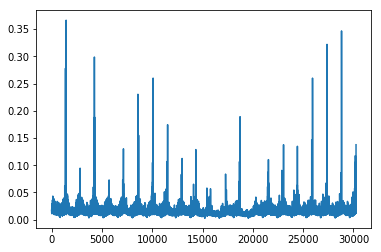

In [12]:
plt.plot(ww)

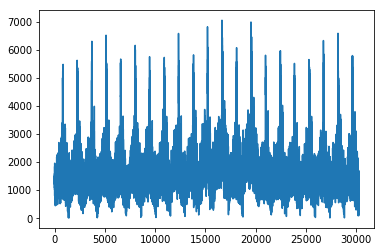

In [8]:
plt.plot(sd.weaponization)